In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
from matplotlib.colors import LogNorm
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker
from cycler import cycle
import matplotlib.image as mpimg
plt.rcParams['text.usetex'] = True

# Switch off interactive mode
#pv.set_jupyter_backend('static')
#pv.start_xvfb()

# Generate Figure 1
Script to make reciprocal space T dependent plots

Text(190, 0.71, '')

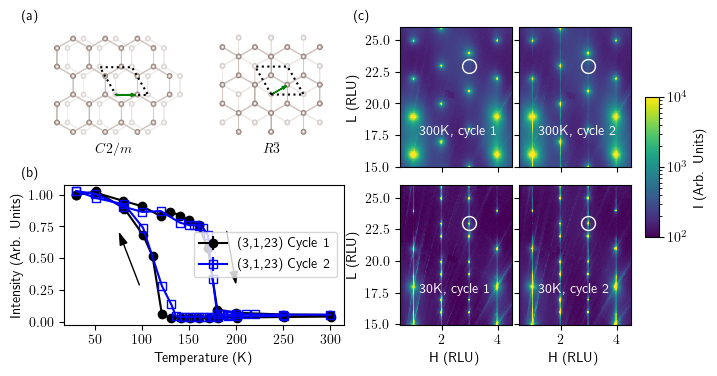

In [4]:
# Make the plot
fig = plt.figure(figsize=(2*(3+3/8)+1/4,(3+3/8)+1/8))

# Plot the crystal structures
dy = 0.4
ax0 = fig.add_axes([0.035, 0.61, 0.44, 0.44*2*2337/5980])
ax0.set_axis_off()
img = mpimg.imread('fig1_switch.png')
ax0.imshow(img)

# Add unit cell and vector to R-3
l1 = 0.7
ax0.arrow(4506, 1336, l1*(4821-4506), l1*(1155-1336),  color='g', head_width=60)
ax0.plot([4506, 5135, 4820, 4193, 4506], [1336, 1336, 793, 793, 1336], ls='dotted', color='k', linewidth=1.5)

# Add unit cell and vector to C2/m
l1 = 0.7
ax0.plot([1490, 2112, 1802, 1178, 1490], [1344, 1344, 805, 805, 1344], ls='dotted', color='k', linewidth=1.5)
ax0.arrow(1490, 1344, l1*(1909-1490), l1*(0),  color='g', head_width=60, zorder=10)

# Add the subplots
ax5 = fig.add_axes([0.07, 0.1, 0.4, dy])
ax1 = fig.add_axes([0.55, 0.55, 0.16, dy])
ax2 = fig.add_axes([0.72, 0.55, 0.16, dy])
ax3 = fig.add_axes([0.55, 0.1, 0.16, dy])
ax4 = fig.add_axes([0.72, 0.1, 0.16, dy])
ax6 = fig.add_axes([0.9, 0.35, 0.02, dy])

# Plot the H1L arrays with cycling temperature
ax3.set_xlabel('H (RLU)')
ax4.set_xlabel('H (RLU)')
ax3.set_ylabel('L (RLU)')
ax1.set_ylabel('L (RLU)')
ax5.set_xlabel('Temperature (K)')
ax5.set_ylabel('Intensity (Arb. Units)')

clim0 = 100
clim1 = 10000

datfile = np.load('tdep_arrs.npz')

h1 = datfile['h1']
l1 = datfile['l1']
data1 = datfile['data1']
im1 = ax1.pcolormesh(h1, l1, data1, norm=LogNorm(clim0,clim1))
ax1.set_xticklabels([])


h1 = datfile['h2']
l1 = datfile['l2']
data1 = datfile['data2']
im3 = ax3.pcolormesh(h1, l1, data1, norm=LogNorm(clim0,clim1))

h1 = datfile['h3']
l1 = datfile['l3']
data1 = datfile['data3']
im2 = ax2.pcolormesh(h1, l1, data1, norm=LogNorm(clim0,clim1))
ax2.set_xticklabels([])
ax2.set_yticklabels([])


h1 = datfile['h4']
l1 = datfile['l4']
data1 = datfile['data4']
art = ax4.pcolormesh(h1, l1, data1, norm=LogNorm(clim0,clim1))
ax4.set_yticklabels([])

cb = plt.colorbar(art, cax=ax6, orientation="vertical")
cb.set_label('I  (Arb. Units)')



# Plot the Bragg peak intensity with temperature cycling
# Temperatures first decrease
datfile = np.load('tdep_lineplot.npz')

ts = datfile['tlist1']
ints = datfile['ilist1']
norm = ints[-1]
ax5.errorbar(ts, ints/norm, np.sqrt(ints)/norm, marker='o', color='k', label='(3,1,23) Cycle 1')

# Temperatures first increase
ts = datfile['tlist2']
ints = datfile['ilist2']
ax5.errorbar(ts, ints/norm, np.sqrt(ints)/norm, marker='o', color='k')

# Temperatures second decrease
ts = datfile['tlist3']
ints = datfile['ilist3']
ax5.errorbar(ts, ints/norm, np.sqrt(ints)/norm, marker='s', color='b', mfc='None', label='(3,1,23) Cycle 2')

# Temperatures second increase
ts = datfile['tlist4']
ints = datfile['ilist4']
ax5.errorbar(ts, ints/norm, np.sqrt(ints)/norm, marker='s', color='b', mfc='None')
ax5.legend()


# Various labels and formatting
ax1.text(1.2, 17.5, '300K, cycle 1', color='w')
ax2.text(1.2, 17.5, '300K, cycle 2', color='w')
ax3.text(1.2, 17.5, '30K, cycle 1', color='w')
ax4.text(1.2, 17.5, '30K, cycle 2', color='w')

ax1.plot(2.97, 22.96, ms=10, color='w', mfc='None', marker='o')
ax2.plot(2.97, 22.96, ms=10, color='w', mfc='None', marker='o')
ax3.plot(2.97, 22.96, ms=10, color='w', mfc='None', marker='o')
ax4.plot(2.97, 22.96, ms=10, color='w', mfc='None', marker='o')

fig.text( 0.01, 0.97, '(a)')
fig.text(0.01, 0.52, '(b)')
fig.text(0.485, 0.97, '(c)')
fig.text(0.355, 0.59, r'$R\bar{3}$')
fig.text(0.115, 0.59, r'$C2/m$')

prop = dict(arrowstyle="-|>,head_width=0.25,head_length=0.8",
            shrinkA=0,shrinkB=0,fc='k')

ax5.annotate("", xy=(75,0.71), xytext=(97,.29), arrowprops=prop)
ax5.annotate("", xy=(200,0.29), xytext=(190,.71), arrowprops=prop)